# EX 3

Implement programs to check stationary of a time series data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [2]:
# Load dataset
df = pd.read_csv("/content/Electric_Production (1).csv", parse_dates=['DATE'], index_col='DATE')

In [3]:
print(df.head())

            IPG2211A2N
DATE                  
1985-01-01     72.5052
1985-02-01     70.6720
1985-03-01     62.4502
1985-04-01     57.4714
1985-05-01     55.3151


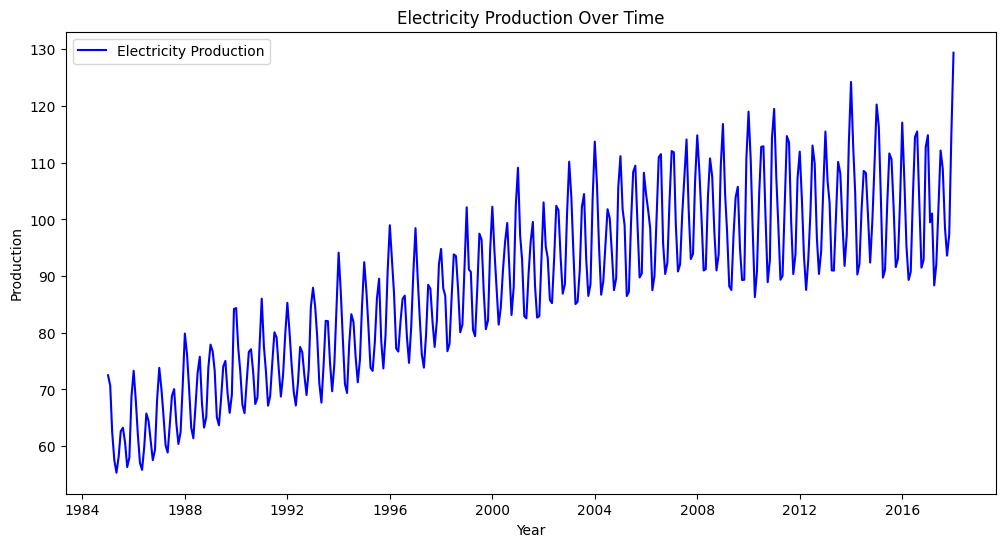

In [5]:
# Plot original time series
plt.figure(figsize=(12, 6))
plt.plot(df['IPG2211A2N'], label="Electricity Production", color='blue')
plt.title("Electricity Production Over Time")
plt.xlabel("Year")
plt.ylabel("Production")
plt.legend()
plt.show()

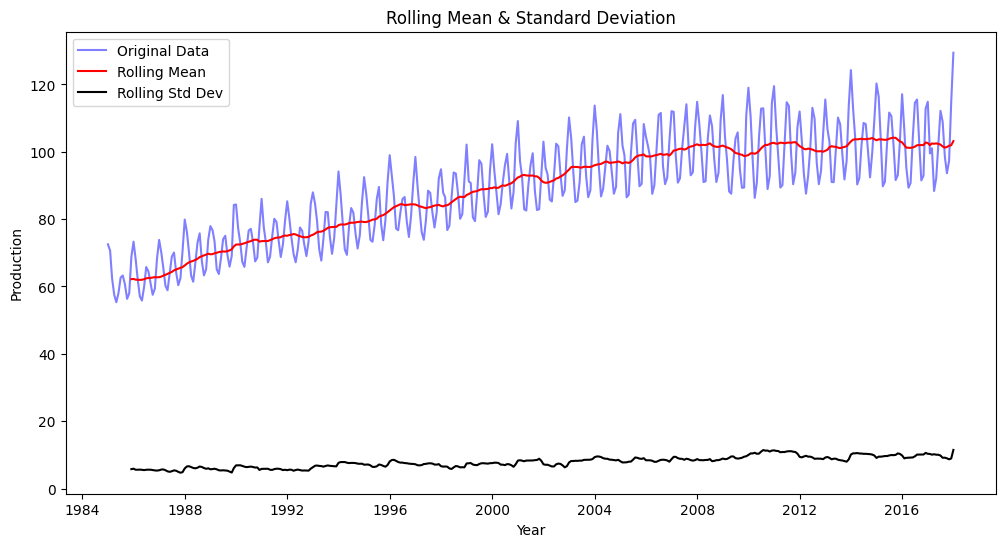

In [6]:
# Calculate rolling statistics
rolling_mean = df['IPG2211A2N'].rolling(window=12).mean()
rolling_std = df['IPG2211A2N'].rolling(window=12).std()

# Plot rolling statistics
plt.figure(figsize=(12, 6))
plt.plot(df['IPG2211A2N'], label="Original Data", color='blue', alpha=0.5)
plt.plot(rolling_mean, label="Rolling Mean", color='red')
plt.plot(rolling_std, label="Rolling Std Dev", color='black')
plt.title("Rolling Mean & Standard Deviation")
plt.xlabel("Year")
plt.ylabel("Production")
plt.legend()
plt.show()


In [9]:
# Perform ADF Test
adf_test = adfuller(df['IPG2211A2N'])

# Extract results
adf_statistic = adf_test[0]
p_value = adf_test[1]
critical_values = adf_test[4]

# Print results
print("Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic: {adf_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")
print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value:.4f}")

# Check if time series is stationary
if p_value < 0.05:
    print("The time series is STATIONARY.")
else:
    print("The time series is NON-STATIONARY.")


Augmented Dickey-Fuller Test Results:
ADF Statistic: -2.2570
P-Value: 0.1862
Critical Values:
   1%: -3.4476
   5%: -2.8692
   10%: -2.5708
The time series is NON-STATIONARY.



ADF Test After Differencing:
ADF Statistic: -7.1049
P-Value: 0.0000
The time series is now STATIONARY after differencing.


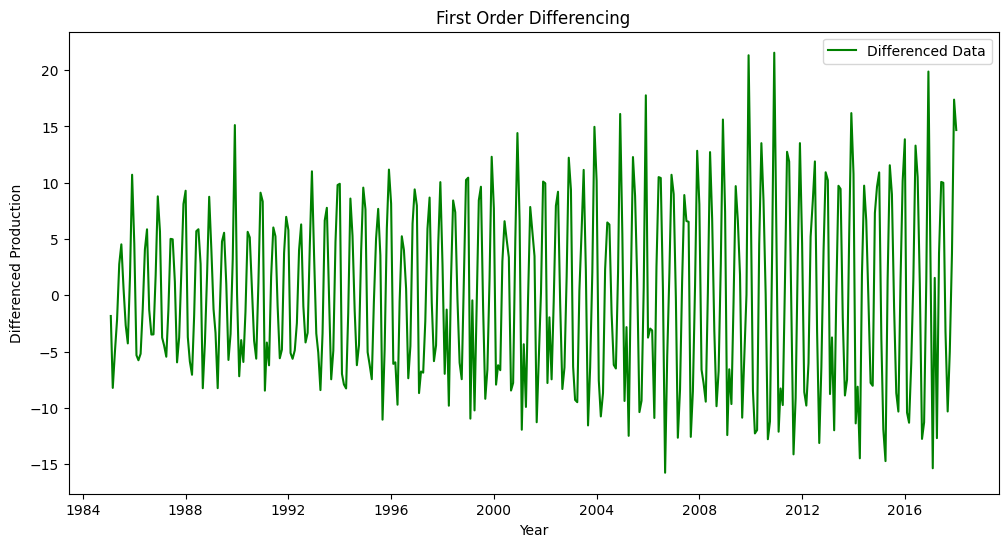

In [11]:
df_diff = df['IPG2211A2N'].diff().dropna()

# Re-run ADF test after differencing
adf_test_diff = adfuller(df_diff)

# Print results
print("\nADF Test After Differencing:")
print(f"ADF Statistic: {adf_test_diff[0]:.4f}")
print(f"P-Value: {adf_test_diff[1]:.4f}")

if adf_test_diff[1] < 0.05:
    print("The time series is now STATIONARY after differencing.")
else:
    print("The time series is still NON-STATIONARY.")

# Plot differenced data
plt.figure(figsize=(12, 6))
plt.plot(df_diff, label="Differenced Data", color='green')
plt.title("First Order Differencing")
plt.xlabel("Year")
plt.ylabel("Differenced Production")
plt.legend()
plt.show()
